In [1]:
from knowknow import *

In [2]:
from load_db import db as dta

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


In [3]:
[k for k in dta.groupings[0][1] if 'England' in k]

['England, P.|comp worth theories',
 'England, P.|comparable worth',
 'England, P.|comp worth wage disc']

In [4]:
top_df_02 = stats.top_decade_stratified(dta, 'c', percentile=0.02, yRange=(1930,2005), debug=False)

loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk
(2110, 12)


In [5]:
top_sort = top_df_02.sort_values('first_added')
top_names = list(top_sort['name'])

In [6]:
top_sort.shape

(2110, 12)

In [8]:
dead_top_02 = []

n_dead = 0
n_tot = 0

for i,r in top_sort.iterrows():
    tt = dta.trend('c', r['name'])
    B,D = tt.births_deaths(death_cutoff=0.1)
    if 'Lipset' in r['name'] and False:
        print(B,D)
        print(r['name'], tt.maxcounty)
        plt.plot(tt.cits())
        #plt.plot()
        plt.show()
        
    n_tot += 1
    
    if len(D):
        # if they didn't die *after* they reached the top 1%, skip
        if D[-1] < r['first_added']:
            continue
        
        n_dead += 1
        dead_top_02.append(r['name'])

(n_dead / n_tot, 1-n_dead / n_tot)

(0.12274881516587678, 0.8772511848341232)

In [8]:
len(dead_top_02)

259

# table

In [9]:
top_df_01 = stats.top_decade_stratified(dta, 'c', percentile=0.01, yRange=(1930,2005), debug=False)

(1043, 12)


In [10]:
my_list = set(dead_top_02).intersection( set(top_df_01['name']) )

In [11]:
[x for x in my_list if 'Davis' in x]

['Davis, K.|human soc']

In [12]:
from tabulate import tabulate

In [13]:
def make_table(names, boldnames):
    
    dead_top_01 = names

    yearmin = 1950
    yearmax = 2015
    tickstep = 10

    rows = []
    rows_s = []

    auth_index = 1
    for k in sorted(dead_top_01, key=lambda x:(x, dta.trend('c', x).first)):
        myr = {}
        parts = k.split("|")
        
        myr['key'] = k

        myr['name'] = parts[0]
        myr['title'] = parts[-1]

        trend = dta.trend('c', k)

        if len(parts) <= 2:
            myr['year'] = str(trend.first) + "*"
        else:
            myr['year'] = parts[1]

        decades = [
            trend.avg_between(YY,YY+10-1)
            for YY in range(trend.first, trend.data_end-10)]

        myr['mxc'] = max(decades)
        myr['mxd'] = np.argmax(decades) + trend.first

        last_10 = trend.avg_between(2005,2015)
        myr['last_10'] = last_10

        B,D = trend.births_deaths(death_cutoff=0.1)

        myr['death'] = D[0]
        myr['deaths'] = len(D)

        #if max(decades) < 2*last_10: # skip those that aren't still sorta dead...
        #    continue

        rows.append(myr)
        
    rows_s = [
        [
            f"<b>{key2name(r['key'])}</b>" if r['key'] in boldnames else key2name(r['key']),
            #f"{r['year']}. {r['title']}",
            f"{r['mxc']:0.1f} ({r['mxd']}—{r['mxd']+10})",
            f"{r['death']}",
            #f"{r['deaths']}",
            f"{r['last_10']:0.1f}"
        ]
        for r
        in rows
    ]

    heads = ['Cited work', 'Best Decade', 'Fall', '2005-15']

    display(HTML(tabulate(rows_s, tablefmt='html', headers=heads)))

In [14]:
def make_table2(names, boldnames):
    
    dead_top_01 = names

    yearmin = 1950
    yearmax = 2015
    tickstep = 10

    rows = []
    rows_s = []

    auth_index = 1
    for k in sorted(dead_top_01, key=lambda x:(x, dta.trend('c', x).first)):
        myr = {}
        parts = k.split("|")
        
        myr['key'] = k

        myr['name'] = parts[0]
        myr['title'] = parts[-1]

        trend = dta.trend('c', k)

        if len(parts) <= 2:
            myr['year'] = str(trend.first) + "*"
        else:
            myr['year'] = parts[1]

        decades = [
            trend.avg_between(YY,YY+10-1)
            for YY in range(trend.first, trend.data_end-10)]

        myr['mxc'] = max(decades)
        myr['mxd'] = np.argmax(decades) + trend.first

        last_10 = trend.avg_between(2005,2015)
        myr['last_10'] = last_10

        B,D = trend.births_deaths(death_cutoff=0.1)

        myr['death'] = D[0]
        myr['deaths'] = len(D)

        #if max(decades) < 2*last_10: # skip those that aren't still sorta dead...
        #    continue

        rows.append(myr)
        
    rows_s = [
        [
            f"<b>{key2name(r['key'])}</b>" if r['key'] in boldnames else key2name(r['key']),
            f"{r['title']}",
            #f"{r['year']}. {r['title']}",
            f"{r['mxc']:0.1f} ({r['mxd']}—{r['mxd']+10})",
            f"{r['death']}",
            #f"{r['deaths']}",
            f"{r['last_10']:0.1f}"
        ]
        for r
        in rows
    ]

    heads = ['Cited work', 'Best Decade', 'Fall', '2005-15']

    display(HTML(tabulate(rows_s, tablefmt='html', headers=heads)))

In [82]:
def make_table3(names, boldnames):
    
    dead_top_01 = names

    yearmin = 1950
    yearmax = 2015
    tickstep = 10

    rows = []
    rows_s = []

    auth_index = 1
    for k in sorted(dead_top_01, key=lambda x:(x, dta.trend('c', x).first)):
        myr = {}
        parts = k.split("|")
        
        myr['key'] = k

        myr['name'] = parts[0]
        myr['title'] = parts[-1]

        trend = dta.trend('c', k)

        if len(parts) <= 2:
            myr['year'] = str(trend.first) + "*"
        else:
            myr['year'] = parts[1]

        decades = [
            trend.avg_between(YY,YY+10-1)
            for YY in range(trend.first, trend.data_end-10)]

        myr['mxc'] = max(decades)
        myr['mxd'] = np.argmax(decades) + trend.first

        last_10 = trend.avg_between(2005,2015)
        myr['last_10'] = last_10

        B,D = trend.births_deaths(death_cutoff=0.1)

        myr['death'] = D[0]
        myr['deaths'] = len(D)

        #if max(decades) < 2*last_10: # skip those that aren't still sorta dead...
        #    continue

        rows.append(myr)
        
    rows_s = [
        [
            f"{key2name2(r['key'])[0]}",
            f"{key2name2(r['key'])[1]}",
            f"{key2name2(r['key'])[2]}",
            f"{r['mxc']:0.1f} ({str(r['mxd'])[-2:]}—{str(r['mxd']+10-1)[-2:]})",
            f"{r['death']}",
            #f"{r['deaths']}",
            f"{r['last_10']:0.1f}"
        ]
        for r
        in rows
    ]

    heads = ['Authors', 'Best Decade', 'Fall', '2005-15']

    display(HTML(tabulate(rows_s, tablefmt='html', headers=heads)))

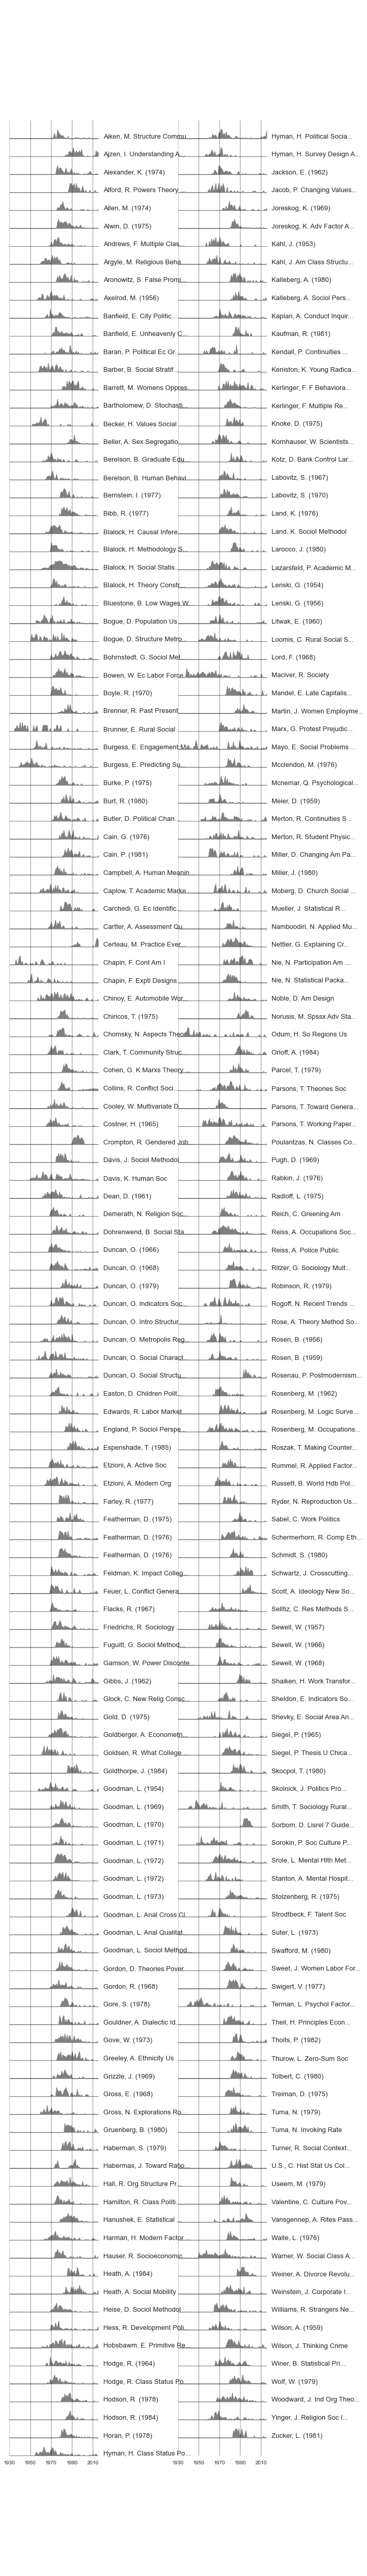

In [15]:
viz.yearly_counts_table_simp(dta, sorted(dead_top_02), yearlim=(1930,2015))

# updated connection to BIB

In [16]:
from csv import DictReader

In [17]:
with open('G:/My Drive/2020 ORGANISATION/1. PROJECTS/qualitative analysis of literature/000 papers/2021 1 american sociologist resub/bib_to_key_map.csv') as in_f:
    rs = list(DictReader(in_f))

In [18]:
mp = {r['WOS']: r['BIB'] for r in rs}

In [19]:
from pybtex.database.input import bibtex


def bib_loop( fn ):
    #open a bibtex file
    parser = bibtex.Parser()
    bibdata = parser.parse_file(fn)

    #loop through the individual references
    for bib_id in bibdata.entries:
        b = bibdata.entries[bib_id].fields
        
        try:
            auths = bibdata.entries[bib_id].persons["author"]
            title = b["title"].replace("{","").replace("}","")
            year = int(b['year'])
            auths_last = [ x.last_names[-1] for x in bibdata.entries[bib_id].persons["author"] ]

            yield {
                'auths': auths,
                'title': title,
                'year': year,
                'auths_last': auths_last,
                'type': bibdata.entries[bib_id].type,
                'key': bib_id
            }

        # field may not exist for a reference
        except(KeyError):
            continue

In [20]:
bibs = {}

In [23]:
bfn = "G:/My Drive/2020 ORGANISATION/1. PROJECTS/qualitative analysis of literature/000 papers/2021 1 american sociologist resub/drafts 3/new_deaths.bib"

In [24]:
for r in bib_loop(bfn):
    bibs[ r['key'] ] = r

In [25]:
list(bibs.values())[-1]

{'auths': [Person('Zucker, Lynne G.'), Person('Rosenstein, Carolyn')],
 'title': 'Taxonomies of Institutional Structure: Dual Economy Reconsidered',
 'year': 1981,
 'auths_last': ['Zucker', 'Rosenstein'],
 'type': 'article',
 'key': 'Zucker1981'}

In [26]:
len(bibs)

259

In [27]:
len(dead_top_02)

259

In [28]:
def key2name(tname, truncate=None):
    if tname not in mp:
        return f"nf:{tname}"
    
    if mp[tname] not in bibs:
        return f"nf2:{tname}"
    
    bib_ent = bibs[ mp[tname] ]
    
    a = bib_ent['auths_last']
    
    if len(a) > 1:
        a = ", ".join( a[:-1] ) + " & " + a[-1]
    else:
        a = a[0]
        
    y = bib_ent['year']
        
    return f"{a} ({y})"

In [29]:
def key2name2(tname, truncate=None):
    if tname not in mp:
        return f"nf:{tname}"
    
    tsp = tname.split("|")
    if mp[tname] not in bibs:
        return (tsp[0], "?", tsp[1:])
    
    bib_ent = bibs[ mp[tname] ]
    
    a = bib_ent['auths_last']
    a = ", ".join( a ).replace("{","").replace("}","")
    
    y = bib_ent['year']
    
    tit = bib_ent['title']
    tit = tit.split(":")[0]
        
    return (a,y,tit)

In [30]:
[key2name2(x) for x in sorted(dead_top_02)[:10]]

[('Aiken, M.', '?', ['structure community']),
 ('Ajzen, Fishbein',
  1980,
  'Understanding attitudes and predicting social behavior'),
 ('Alexander, Eckland',
  1974,
  'Sex Differences in the Educational Attainment Process'),
 ('Alford, Friedland', 1985, 'Powers of Theory'),
 ('Allen', 1974, 'The Structure of Interorganizational Elite Cooptation'),
 ('Alwin, Hauser', 1975, 'The Decomposition of Effects in Path Analysis'),
 ('Andrews', 1967, 'Multiple Classification Analysis'),
 ('Argyle', 1958, 'Religious behavior'),
 ('Aronowitz', 1973, 'False promises'),
 ('Axelrod', 1956, 'Urban Structure and Social Participation')]

In [31]:
make_table(dead_top_02, boldnames=set(top_df_01['name']))

Cited work,Best Decade,Fall,2005-15
"nf2:Aiken, M.|structure community",3.3 (1972—1982),2002,0.1
Ajzen & Fishbein (1980),5.0 (1990—2000),2000,1.5
Alexander & Eckland (1974),4.4 (1975—1985),1995,0.7
Alford & Friedland (1985),2.9 (1987—1997),2002,0.2
Allen (1974),3.8 (1976—1986),1987,0.2
Alwin & Hauser (1975),10.3 (1976—1986),2002,0.5
Andrews (1967),6.5 (1970—1980),1997,0
Argyle (1958),3.6 (1967—1977),1988,0
Aronowitz (1973),5.3 (1976—1986),1996,0.3
Axelrod (1956),3.7 (1966—1976),1984,0.4


In [43]:
make_table(dead_top_02, boldnames=set(top_df_01['name']))

Cited work,Best Decade,Fall,2005-15
"nf2:Aiken, M.|structure community",3.7 (1972—1982),2002,0.1
Ajzen & Fishbein (1980),5.6 (1990—2000),2000,1.6
Alexander & Eckland (1974),4.9 (1975—1985),1995,0.8
Alford & Friedland (1985),3.2 (1987—1997),2002,0.2
Allen (1974),4.2 (1976—1986),1987,0.2
Alwin & Hauser (1975),11.4 (1976—1986),2002,0.5
Andrews (1967),7.2 (1970—1980),1997,0
Argyle (1958),4.0 (1967—1977),1988,0
Aronowitz (1973),5.9 (1976—1986),1996,0.3
Axelrod (1956),4.1 (1966—1976),1984,0.4


In [32]:
[x for x in top_df_01['name'] if 'Bogue' in x]

['Bogue, D.|population us']

In [83]:
make_table3(dead_top_02, boldnames=set(top_df_01['name']))

,,Authors,Best Decade,Fall,2005-15
"Aiken, M.",?,['structure community'],3.3 (72—81),2002,0.1
"Ajzen, Fishbein",1980,Understanding attitudes and predicting social behavior,5.0 (90—99),2000,1.5
"Alexander, Eckland",1974,Sex Differences in the Educational Attainment Process,4.4 (75—84),1995,0.7
"Alford, Friedland",1985,Powers of Theory,2.9 (87—96),2002,0.2
Allen,1974,The Structure of Interorganizational Elite Cooptation,3.8 (76—85),1987,0.2
"Alwin, Hauser",1975,The Decomposition of Effects in Path Analysis,10.3 (76—85),2002,0.5
Andrews,1967,Multiple Classification Analysis,6.5 (70—79),1997,0
Argyle,1958,Religious behavior,3.6 (67—76),1988,0
Aronowitz,1973,False promises,5.3 (76—85),1996,0.3
Axelrod,1956,Urban Structure and Social Participation,3.7 (66—75),1984,0.4


In [84]:
dta.search('c', "Russett")

['Russett, B.|1964|world polit,v16,p442',
 'Russett, B.|2000|j peace res,v37,p583',
 'Russett, B.|grasping democratic',
 'Russett, B.|interest ideology fo',
 'Russett, B.|triangulating peace',
 'Russett, B.|what price vigilance',
 'Russett, B.|world hdb political',
 'Russett, C.|sexual sci victorian']

In [85]:
t = dta.trend('c', 'Russett, B.|world hdb political')

In [86]:
t.avg_between(1967,1976)

3.3

In [87]:
t.avg_between(2005, 2015)

0.09090909090909091

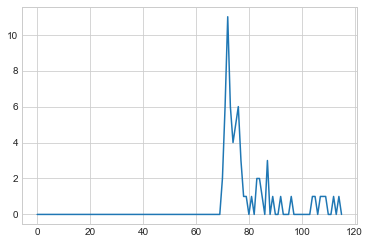

In [43]:
plt.plot(t.cits())

In [40]:
len(dead_top_02)

259

In [25]:
already = ["Ajzen, I.|understanding attitu","Alwin, D.|1975|am sociol rev,v40,p37","Andrews, F.|multiple classificat","Aronowitz, S.|false promises","Barber, B.|social stratificatio","Bibb, R.|1977|soc forces,v55,p974","Blalock, H.|causal inferences no","Blalock, H.|methodology social r","Blalock, H.|social statistics","Blalock, H.|theory construction","Bogue, D.|population us","Bogue, D.|structure metropolit","Bohrnstedt, G.|sociol methodol","Bowen, W.|ec labor force parti","Boyle, R.|1970|am j sociol,v75,p461","Burgess, E.|engagement marriage","Burgess, E.|predicting success f","Collins, R.|conflict sociology e","Costner, H.|1965|am sociol rev,v30,p341","Davis, J.|sociol methodol","Davis, K.|human soc","Dean, D.|1961|am sociol rev,v26,p753","Dohrenwend, B.|social status psycho","Duncan, O.|1966|am j sociol,v72,p1","Duncan, O.|1968|am j sociol,v74,p119","Duncan, O.|intro structural equ","Duncan, O.|social structure mob","Edwards, R.|labor market segment","Featherman, D.|1976|am sociol rev,v41,p462","Fischer, C.|dwell friends person","Flacks, R.|1967|j soc issues,v23,p52","Friedrichs, R.|sociology sociology","Gamson, W.|power discontent","Goldberger, A.|econometric theory","Goodman, L.|1954|j am stat assoc,v49,p732","Goodman, L.|1970|j am stat assoc,v65,p226","Goodman, L.|1972|am j sociol,v77,p1035","Goodman, L.|1972|am sociol rev,v37,p28","Goodman, L.|anal qualitative cat","Goodman, L.|sociol methodol","Gordon, D.|theories poverty und","Gordon, R.|1968|am j sociol,v73,p592","Gove, W.|1973|am j sociol,v78,p812","Gross, N.|explorations role an","Haberman, S.|1979|anal qualitative dat,v2","Hall, R.|org structure proces","Hanushek, E.|statistical methods","Harman, H.|modern factor anal","Heise, D.|sociol methodol","Hess, R.|development politica","Hodson, R.|1978|polit soc,v8,p429","Horan, P.|1978|am sociol rev,v43,p534","Hyman, H.|class status power","Kahl, J.|am class structure","Kardiner, A.|psychol frontiers so","Keniston, K.|young radicals notes","Kerlinger, F.|multiple regression","Kolb, J.|study rural soc","Labovitz, S.|1967|soc forces,v46,p151","Labovitz, S.|1970|am sociol rev,v35,p515","Land, K.|sociol methodol","Latour, B.|laboratory life soci","Lenski, G.|1954|am sociol rev,v19,p405","Loomis, C.|rural social systems","Maciver, R.|society","Mandel, E.|late capitalism","Martin, J.|women employment lif","Mayo, E.|social problems ind","Mead, M.|coming age samoa","Merton, R.|continuities social","Nettler, G.|explaining crime","Nie, N.|statistical package","Parsons, T.|toward general theor","Parsons, T.|working papers theor","Poulantzas, N.|classes cont capital","Reiss, A.|occupations social s","Robinson, R.|1979|am sociol rev,v44,p38","Rose, A.|theory method social","Schwartz, J.|crosscutting social","Shevky, E.|social area anal","Siegel, P.|thesis u chicago","Smith, T.|sociology rural life","Sorokin, P.|soc culture personal","Srole, L.|mental hlth metropol","Stolzenberg, R.|1975|am sociol rev,v40,p645","Terman, L.|psychol factors mari","Theil, H.|principles econometr","Thoits, P.|1982|j health soc behav,v23,p145","Tolbert, C.|1980|am j sociol,v85,p1095","Treiman, D.|1975|am sociol rev,v40,p174","Turner, R.|social context ambit","U.S., C.|hist stat us col tim","Valentine, C.|culture poverty crit","Warner, W.|social class am","Wolf, W.|1979|am sociol rev,v44,p235","Woodward, J.|ind org theory pract","Yinger, J.|religion soc individ",]

In [28]:
to_get_cits = set(dead_top_02).difference(set(already))
len(to_get_cits)

169

In [55]:
def fmt_for_search(x):
    s = x.split("|")
    ret = []

    if len(s) == 2:
        ret += ["ti:"+" ".join( '%s*' % x for x in s[-1].split() )]
        ret += ["au:%s" % s[0].split(",")[0]]
    else:
        ret += [" ".join( 
            '"%s"' % x if not re.match( r'[vp][0-9]+', x ) else '"%s"' % x[1:] 
            for x in s[-1].split(",")[1:] )]
        ret += ["'%s'" %  x.split("|")[1]]
        ret += ["'%s'" % s[0].split(",")[0]]
        
    return " ".join(ret)

In [40]:
len(already)

97

In [41]:
len(to_get_cits)

169

In [50]:
print("\n".join( map(lambda x: " --- ".join((str(x[0]+1),x[1])), enumerate(sorted(to_get_cits))) ))

1 --- Aiken, M.|structure community
2 --- Alexander, K.|1974|am sociol rev,v39,p668
3 --- Alford, R.|powers theory capita
4 --- Allen, M.|1974|am sociol rev,v39,p393
5 --- Argyle, M.|religious behavior
6 --- Axelrod, M.|1956|am sociol rev,v21,p13
7 --- Banfield, E.|city politics
8 --- Banfield, E.|unheavenly city
9 --- Baran, P.|political ec growth
10 --- Barrett, M.|womens oppression to
11 --- Bartholomew, D.|stochastic models so
12 --- Becker, H.|values social interp
13 --- Beller, A.|sex segregation work
14 --- Berelson, B.|graduate education u
15 --- Berelson, B.|human behavior inven
16 --- Bernstein, I.|1977|am sociol rev,v42,p743
17 --- Bluestone, B.|low wages working po
18 --- Brenner, R.|past present
19 --- Brunner, E.|rural social trends
20 --- Burke, P.|1975|soc probl,v22,p313
21 --- Burt, R.|1980|annu rev sociol,v6,p79
22 --- Butler, D.|political change bri
23 --- Cain, G.|1976|j econ lit,v14,p1215
24 --- Cain, P.|1981|am sociol rev,v46,p253
25 --- Campbell, A.|human meaning

In [56]:
#print("\n".join( map(lambda x: " --- ".join((fmt_for_search(x),x)), sorted(to_get_cits)) ))
#print("\n".join( map(fmt_for_search, sorted(to_get_cits)) ))
print("\n".join( map(lambda x: "".join(("",fmt_for_search(x[1]))), enumerate(sorted(to_get_cits))) ))

ti:structure* community* au:Aiken
"39" "668" '1974' 'Alexander'
ti:powers* theory* capita* au:Alford
"39" "393" '1974' 'Allen'
ti:religious* behavior* au:Argyle
"21" "13" '1956' 'Axelrod'
ti:city* politics* au:Banfield
ti:unheavenly* city* au:Banfield
ti:political* ec* growth* au:Baran
ti:womens* oppression* to* au:Barrett
ti:stochastic* models* so* au:Bartholomew
ti:values* social* interp* au:Becker
ti:sex* segregation* work* au:Beller
ti:graduate* education* u* au:Berelson
ti:human* behavior* inven* au:Berelson
"42" "743" '1977' 'Bernstein'
ti:low* wages* working* po* au:Bluestone
ti:past* present* au:Brenner
ti:rural* social* trends* au:Brunner
"22" "313" '1975' 'Burke'
"6" "79" '1980' 'Burt'
ti:political* change* bri* au:Butler
"14" "1215" '1976' 'Cain'
"46" "253" '1981' 'Cain'
ti:human* meaning* social* au:Campbell
ti:academic* marketplace* au:Caplow
ti:ec* identification* so* au:Carchedi
ti:assessment* quality* g* au:Cartter
"1" '1996' 'Castells'
ti:practice* everyday* li* au:Cer

In [87]:
for x in set(top_df_01['name']).intersection(dead_top_02).difference(set(already)):
    
    if x in already:
        continue
        
    s = x.split("|")
    
    ret = ['"%s"' % " ".join( reversed( s[0].split(",")[:-1] ) )]
    if len(s) == 2:
        ret += [" ".join( '"%s"' % x for x in s[-1].split() )]
    else:
        ret += [" ".join( 
            '"%s"' % x if not re.match( r'[vp][0-9]+', x ) else '"%s"' % x[1:] 
            for x in s[-1].split(",")[1:] )]
        ret += ["'%s'" %  x.split("|")[1]]
        
    print(" ".join(ret))
    print(x)

"Odum" "so" "regions" "us"
Odum, H.|so regions us
"Brunner" "rural" "social" "trends"
Brunner, E.|rural social trends
"Chapin" "cont" "am" "i"
Chapin, F.|cont am i


In [59]:
t01 = set(top_df_01['name'])
len([x for x in dead_top_02 if x in t01])

91

In [60]:
[x for x in dead_top_02 if 'Sorokin' in x]

['Sorokin, P.|soc culture personal']

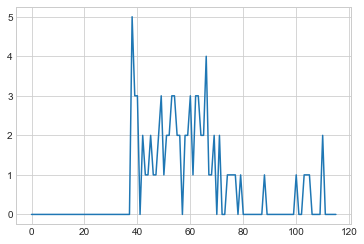

In [63]:
plt.plot(dta.trend('c','Maciver, R.|society').cits())

In [62]:
dta.search('c','Maciver')

loading variable sociology-wos-74b/ind ___ c from disk


['Maciver, R.|more perfect union',
 'Maciver, R.|ramparts we guard',
 'Maciver, R.|social causation',
 'Maciver, R.|society',
 'Maciver, R.|web govt']